In [3]:
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd

In [4]:
# Apply the default theme
sns.set_theme()

In [5]:
data = pd.read_csv('./dataset/cves.csv')
data

,Unnamed: 0,cve.id,cve.published,cve.metrics.cvssMetricV31.cvssData.baseScore,cve.metrics.cvssMetricV31.cvssData.baseSeverity,cve.metrics.cvssMetricV31.cvssData.attackVector,year
0,194,CVE-1999-0236,1997-01-01T05:00:00.000,7.5,HIGH,NETWORK,1999
1,8217,CVE-2004-1865,2004-03-26T05:00:00.000,4.8,MEDIUM,NETWORK,2004
2,31380,CVE-2008-1447,2008-07-08T23:41:00.000,6.8,MEDIUM,NETWORK,2008
3,31393,CVE-2008-2812,2008-07-09T00:41:00.000,7.8,HIGH,LOCAL,2008
4,31401,CVE-2008-2931,2008-07-09T18:41:00.000,7.8,HIGH,LOCAL,2008
...,...,...,...,...,...,...,...
81884,197728,CVE-2023-28426,2023-03-20T14:15:11.767,5.3,MEDIUM,NETWORK,2023
81885,197730,CVE-2023-28428,2023-03-20T15:15:12.360,6.2,MEDIUM,LOCAL,2023
81886,197731,CVE-2023-28429,2023-03-20T15:15:12.447,6.1,MEDIUM,NETWORK,2023
81887,197753,CVE-2023-22288,2023-03-20T16:15:13.120,4.1,MEDIUM,NETWORK,2023


In [6]:
# Distribution of CVEs by attack vector 

labels = data['cve.metrics.cvssMetricV31.cvssData.attackVector'].unique()

cves_per_attack_vector = data.groupby('cve.metrics.cvssMetricV31.cvssData.attackVector').size()
cves_per_attack_vector = [
    cves_per_attack_vector[l] for l in labels
]

([<matplotlib.patches.Wedge at 0x7fd58ff1fb90>,
 [Text(-1.391699953573907, 1.7038694900790925, 'HIGH'),
  Text(1.1932122922498685, -1.8483085309611638, 'MEDIUM'),
  Text(2.176219836415932, -0.32259451884651436, 'CRITICAL'),
  Text(2.198611906421021, -0.07813888240641644, 'LOW')],
 [Text(-0.7591090655857673, 0.9293833582249593, '72%'),
  Text(0.6508430684999281, -1.00816828961518, '25%'),
  Text(1.1870290016814173, -0.17596064664355326, '2%'),
  Text(1.1992428580478296, -0.04262120858531805, '1%')])

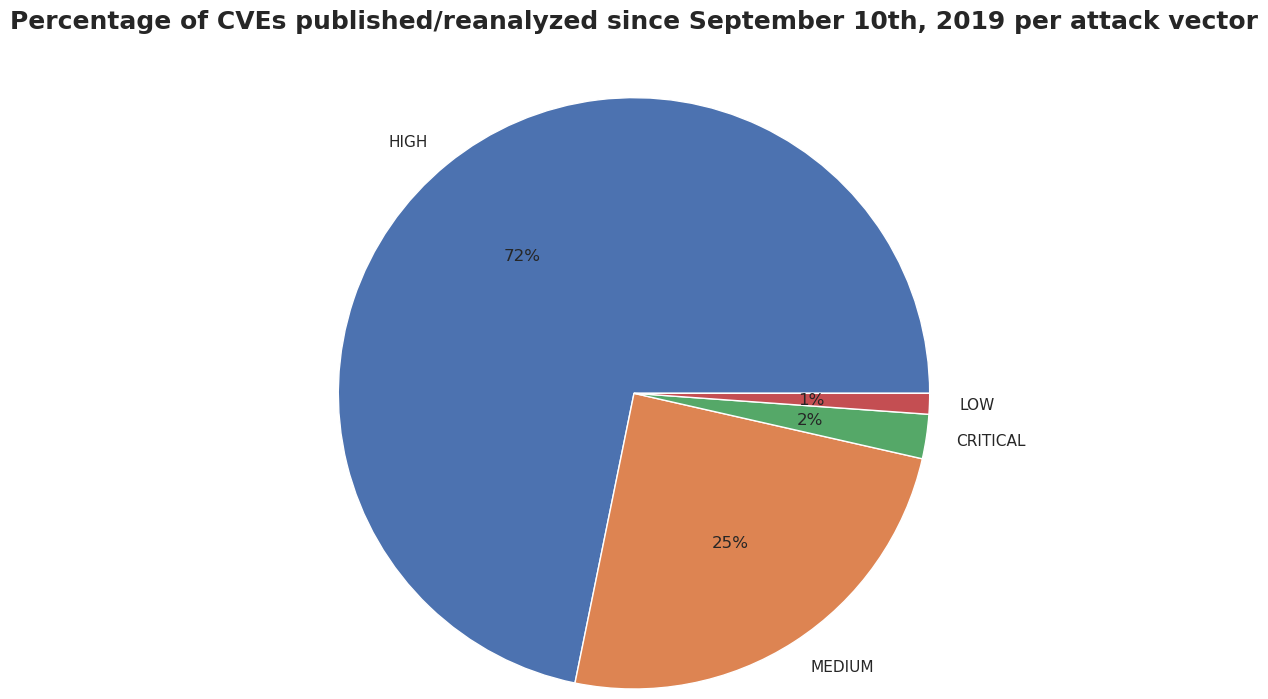

In [63]:
plt.title(
    'Percentage of CVEs published/reanalyzed since September 10th, 2019 per attack vector',
    fontdict={"fontsize": 18, "fontweight": 600},
    pad=10,
    y=1.45
    )
plt.pie(cves_per_attack_vector, labels=labels, autopct='%.0f%%', radius=2)

In [11]:
# Distribution of CVEs by severity
# Pie Chart

labels = data['cve.metrics.cvssMetricV31.cvssData.baseSeverity'].unique()

cves_per_serverity = data.groupby('cve.metrics.cvssMetricV31.cvssData.baseSeverity').size()
cves_per_serverity = [
    cves_per_serverity[l] for l in labels
]

([<matplotlib.patches.Wedge at 0x7fd5940ecbf0>,
 [Text(0.5691912637849328, 2.1250932462437766, 'HIGH'),
  Text(-1.5906927076281452, -1.5197686369637455, 'MEDIUM'),
  Text(1.8035788600584497, -1.2598028796404082, 'CRITICAL'),
  Text(2.1956044675531734, -0.13900007935446257, 'LOW')],
 [Text(0.3104679620645087, 1.1591417706784235, '42%'),
  Text(-0.86765056779717, -0.8289647110711338, '41%'),
  Text(0.9837702873046088, -0.6871652070765861, '15%'),
  Text(1.1976024368471854, -0.07581822510243412, '2%')])

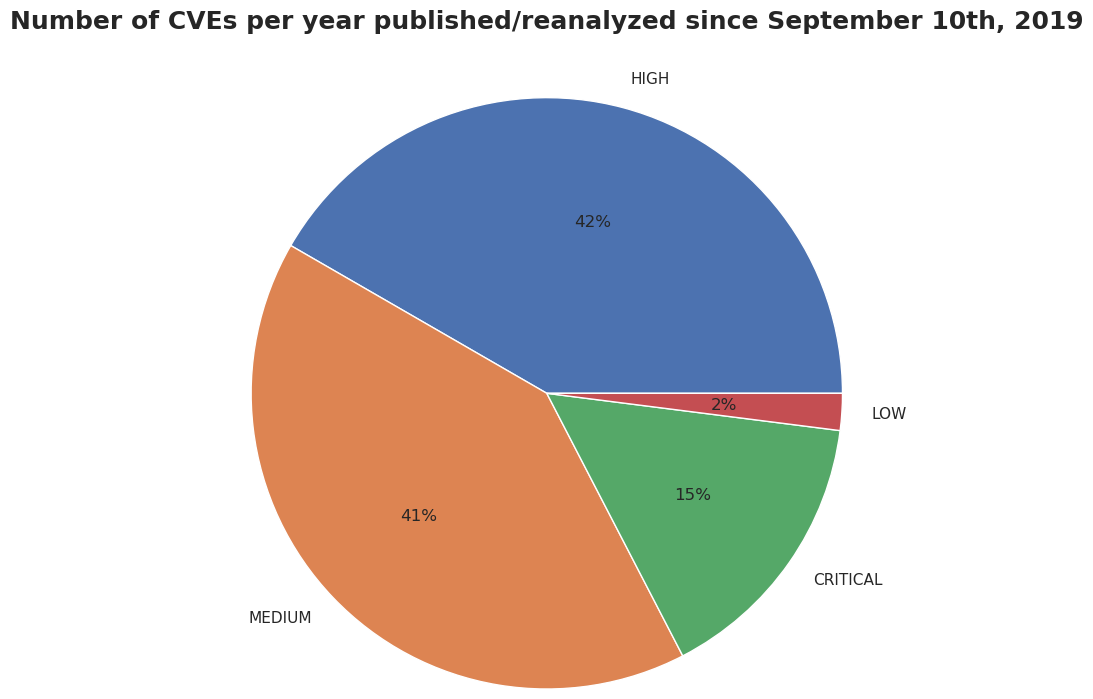

In [62]:
plt.title(
    'Percentage of CVEs published/reanalyzed since September 10th, 2019 per severity',
    fontdict={"fontsize": 18, "fontweight": 600},
    pad=10,
    y=1.45
    )
plt.pie(cves_per_serverity, labels=labels, autopct='%.0f%%', radius=2)

In [29]:
# Distribution of CVEs across year
# Horizontal Bar Chart
cves_per_year = data.groupby('year').size()
cves_per_year = cves_per_year.reset_index()

cves_per_year.columns = ['year', 'count']
cves_per_year

,year,count
0,1999,2
1,2002,4
2,2003,3
3,2004,2
4,2005,9
5,2006,8
6,2007,15
7,2008,16
8,2009,41
9,2010,162


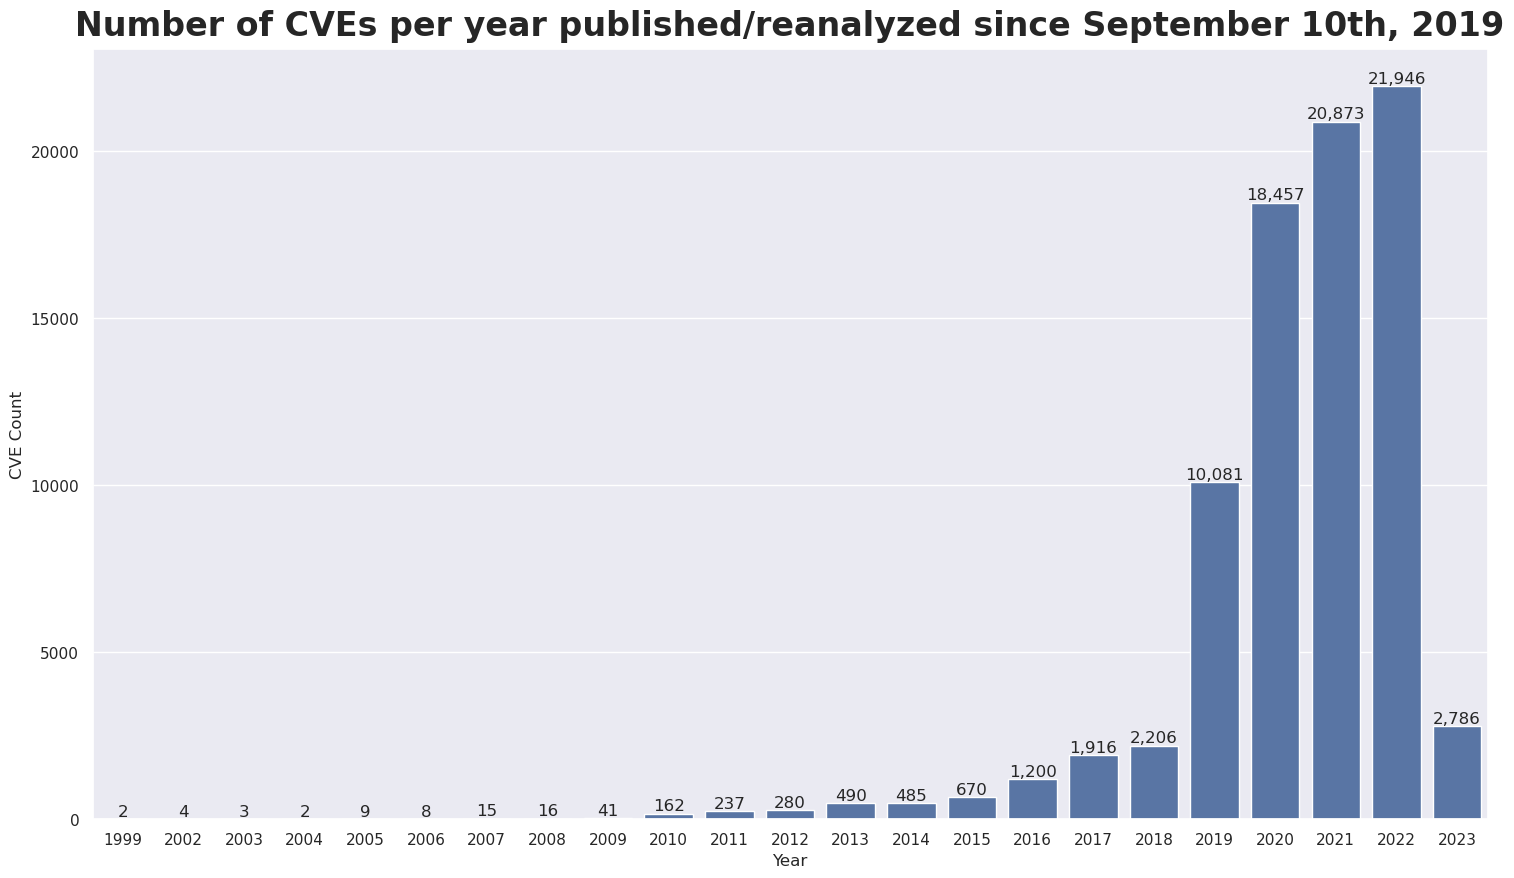

In [61]:
plt.figure(figsize=(18, 10))

chart = sns.barplot(x='year', y='count', data = cves_per_year)

plt.title(
    'Number of CVEs per year published/reanalyzed since September 10th, 2019',
    fontdict={"fontsize": 24, "fontweight": 600},
    pad=10
    )
plt.xlabel('Year')
plt.ylabel('CVE Count')

# Add labels to the top of each bar
for p in chart.patches:
    chart.annotate(f'{format(round(p.get_height()), ',')}',
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom')
    
plt.show()